In [18]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from tensorflow import keras

import numpy as np

In [2]:
# load the dataset
dataset = np.loadtxt('files/pima-indians-diabetes.csv', delimiter=',', skiprows=1)
# 1st row is header
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [3]:
X = dataset[:,0:8]
y = dataset[:,8]

In [4]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
len(y)

768

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In Keras, there are two ways to create a model, the `Sequential model` and the `Functional API`.

* The `Sequential model` is a bit more intuitive in the sense that it considers a neural network as a stack of layers where each layer has exactly one input tensor and one output tensor, which is the usual way a neural work is presented;
* `Function API` is more flexible than `Sequential model` because it can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

Although `Sequential model` should be enough for this project, for the sake of accommodating possible future needs, `Functional API` approach is used.

In [33]:
visible = Input(shape=(8,))
hidden1 = Dense(10, activation='relu')(visible)
hidden2 = Dense(20, activation='relu')(hidden1)
hidden3 = Dense(10, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_15 (Dense)            (None, 10)                90        
                                                                 
 dense_16 (Dense)            (None, 20)                220       
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


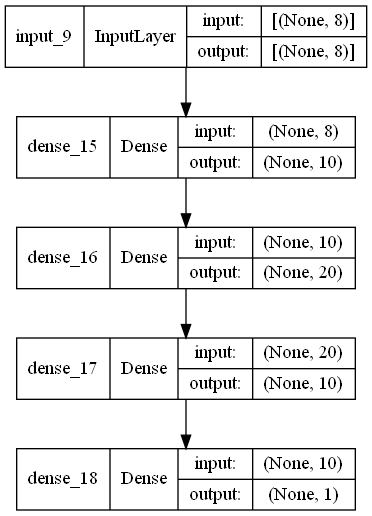

In [34]:
keras.utils.plot_model(model, show_shapes=True)

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
52/52 [==============================] - 1s 4ms/step - loss: 2.6769 - accuracy: 0.5214
Epoch 2/50
52/52 [==============================] - 0s 4ms/step - loss: 0.9937 - accuracy: 0.5953
Epoch 3/50
52/52 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.6420
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.6401
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6459
Epoch 6/50
52/52 [==============================] - 0s 4ms/step - loss: 0.6581 - accuracy: 0.6381
Epoch 7/50
52/52 [==============================] - 0s 4ms/step - loss: 0.6760 - accuracy: 0.6440
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6690 - accuracy: 0.6459
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6654
Epoch 10/50
52/52 [==============================] - 0s 4ms/step - loss: 0.6226 - accuracy: 0.6965
Epoch 11/50
52/52 [

In [37]:
# evaluate the keras model
_, train_accuracy = model.evaluate(X_train, y_train)
_, test_accuracy = model.evaluate(X_test, y_test)
print(f'Train accuracy: {train_accuracy*100:.2f}%, Test accuracy: {test_accuracy*100:.2f}%')

8/8 [==============================] - 0s 3ms/step - loss: 0.6730 - accuracy: 0.6772
Train accuracy: 70.62%, Test accuracy: 67.72%


Confusion matrix:
[[320  12]
 [139  43]]


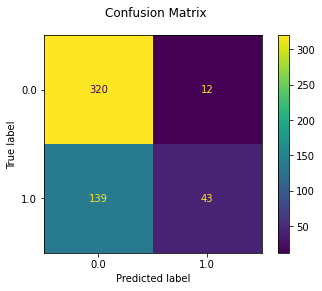

In [38]:
y_pred = (model.predict(X_train) > 0.5).astype(int)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_train, y_pred=y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

Confusion matrix:
[[156  12]
 [ 70  16]]


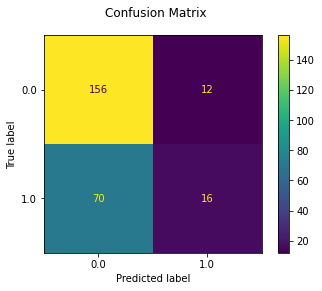

In [39]:
y_pred = (model.predict(X_test) > 0.5).astype(int)
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")